In [25]:
# install libraries/ set up script
import pandas as pd
import numpy as np
import folium
import geopy

In [166]:
#Load the locations file
loc_df = pd.read_csv('AllTheLocations.csv')
loc_df.head(10)

,Unnamed: 0,HometownLatitude,HometownLongitude,UndergradLatitude,UndergradLongitude,RA_LM_Latitude,RA_LM_Longitude,Masters_Latitude,Masters_Longitude,PHD_Latitude,PHD_Longitude,PostDoc_Latitude,PostDoc_Longitude,Faculty_Latitude,Faculty_Longitude
0,0,43.507303,16.441423,41.823989,-71.412834,41.308214,-72.925052,NaN,NaN,40.441694,-79.990086,NaN,NaN,NaN,NaN
1,1,45.438496,10.992412,45.886548,11.045237,NaN,NaN,45.886548,11.045237,45.886548,11.045237,42.953765,-81.229153,NaN,NaN
2,2,52.238524,-0.902493,-34.424394,150.893850,-37.814218,144.963161,NaN,NaN,-37.814218,144.963161,NaN,NaN,NaN,NaN
3,3,22.279328,114.162813,22.279328,114.162813,52.477540,-1.894053,52.477540,-1.894053,52.477540,-1.894053,51.451495,-0.983634,NaN,NaN
4,4,41.875562,-87.624421,42.268157,-83.731229,39.952724,-75.163526,NaN,NaN,39.952724,-75.163526,NaN,NaN,NaN,NaN
5,5,37.692236,-97.337545,38.971938,-95.235950,NaN,NaN,38.895009,-77.036563,38.895009,-77.036563,41.308214,-72.925052,32.776272,-96.796856
6,6,-34.607562,-58.437076,-34.607562,-58.437076,-34.607562,-58.437076,-34.607562,-58.437076,50.110644,8.682092,NaN,NaN,NaN,NaN
7,7,58.014965,56.246723,55.750446,37.617494,55.682893,37.622377,51.469975,-0.089082,48.856610,2.351499,58.014965,56.246723,58.014965,56.246723
8,8,18.938771,72.835335,18.938771,72.835335,39.952724,-75.163526,35.227087,-80.843127,32.717421,-117.162771,34.053691,-118.242767,NaN,NaN
9,9,39.101454,-84.512460,37.444329,-122.159847,40.712728,-74.006015,52.203482,0.123582,40.349274,-74.659296,NaN,NaN,NaN,NaN


In [167]:
#CALCULATE DISTANCE!
from geopy import distance

#Create new dataframe

# df_distances = pd.DataFrame(columns=['dist_home_undergrad', 'dist_undergrad_ra', 'dist_ra_msc', 'dist_msc_phd', 'dist_phd_postdoc', 'dist_postdoc_fac'])

dist_home_undergrad = []
dist_undergrad_ra = []
dist_ra_msc = []
dist_msc_phd = []
dist_phd_postdoc = []
dist_postdoc_fac = []


#Home to undergrad
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.UndergradLatitude[person]) or pd.isnull(loc_df.UndergradLatitude[person]):
        dist_home_undergrad.append(None)
        
    else:
        hometown = (loc_df.HometownLatitude[person], loc_df.HometownLongitude[person])
        undergrad = (loc_df.UndergradLatitude[person], loc_df.UndergradLongitude[person])
        
        dist_h_u = [distance.distance(hometown, undergrad).miles]
        dist_home_undergrad.append(dist_h_u)
        
#Undergrad to RA
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.UndergradLatitude[person]) or pd.isnull(loc_df.RA_LM_Latitude[person]):
        dist_undergrad_ra.append(None)
        
    else:
        undergrad = (loc_df.UndergradLatitude[person], loc_df.UndergradLongitude[person])
        ra = (loc_df.RA_LM_Latitude[person], loc_df.RA_LM_Longitude[person])
        
        dist_u_ra = [distance.distance(undergrad, ra).miles]
        dist_undergrad_ra.append(dist_u_ra)

#RA to MSc
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.RA_LM_Latitude[person]) or pd.isnull(loc_df.Masters_Latitude[person]):
        dist_ra_msc.append(None)
        
    else:
        ra = (loc_df.RA_LM_Latitude[person], loc_df.RA_LM_Longitude[person])
        masters = (loc_df.Masters_Latitude[person], loc_df.Masters_Longitude[person])
        
        dist_r_m = [distance.distance(ra, masters).miles]
        dist_ra_msc.append(dist_r_m)

#MSc to PhD
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.Masters_Latitude[person]) or pd.isnull(loc_df.PHD_Latitude[person]):
        dist_msc_phd.append(None)
        
    else:
        masters = (loc_df.Masters_Latitude[person], loc_df.Masters_Longitude[person])
        phd = (loc_df.PHD_Latitude[person], loc_df.PHD_Longitude[person])
        
        dist_m_p = [distance.distance(masters, phd).miles]
        dist_msc_phd.append(dist_m_p)

#PhD to Postdoc
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.PHD_Latitude[person]) or pd.isnull(loc_df.PostDoc_Latitude[person]):
        dist_phd_postdoc.append(None)
        
    else:
        phd = (loc_df.PHD_Latitude[person], loc_df.PHD_Longitude[person])
        postdoc = (loc_df.PostDoc_Latitude[person], loc_df.PostDoc_Longitude[person])
        
        dist_p_p = [distance.distance(phd, postdoc).miles]
        dist_phd_postdoc.append(dist_p_p)

#Postdoc to Faculty
for person in range(len(loc_df.iloc[:,1])):
        
    if pd.isnull(loc_df.PostDoc_Latitude[person]) or pd.isnull(loc_df.Faculty_Latitude[person]):
        dist_postdoc_fac.append(None)
        
    else:
        postdoc = (loc_df.PostDoc_Latitude[person], loc_df.PostDoc_Longitude[person])
        faculty = (loc_df.Faculty_Latitude[person], loc_df.Faculty_Longitude[person])
        
        dist_p_f = [distance.distance(postdoc, faculty).miles]
        dist_postdoc_fac.append(dist_p_f)
        

print(dist_home_undergrad)
 

[[4250.665710257769], [31.048992148054545], [10577.48298266858], [0.0], [202.0069663582605], [144.31061178853503], [0.0], [720.3823451874198], [0.0], [2035.5497293745261], [1.8406153864607837], [648.1426156357612], [0.0], [935.5598084189987], [94.06867567968665], [201.86187524934795], [0.0], None, [0.0], [260.4403585081987], [194.92669749918787], [1059.2850028240568], [34.22698922795486], [0.0], [7364.635599638632], [33.402384994776604], [0.0], [0.0], [682.7695955293506], [2545.934742988912], [0.0], [0.0], [1817.4540472461103], [104.6883410179589], [0.0], [239.1486430741042], [2389.4819929268447], [635.4948613295513], [183.47926439201774], [270.58188059971246], [140.85060967158103], [43.68700543803775], [193.6435369311636], [15.486298160169897], [108.98401094041864], [0.0], [63.17333383893114], [8.584656976677257], [172.37205080755336], [1794.326041325752], [44.70017435303152], [0.0], None, [59.327951329851054], [163.02518890203345], [204.26383522631812], None]


In [35]:
#Save in the matrix for plotting
all_distances = pd.DataFrame(columns=['home_to_und', 'und_to_ra', 'ra_to_msc', 'msc_to_phd',
                                      'phd_to_post', 'post_to_fac'])

all_distances.home_to_und = dist_home_undergrad
all_distances.und_to_ra = dist_undergrad_ra
all_distances.ra_to_msc = dist_ra_msc
all_distances.msc_to_phd = dist_msc_phd
all_distances.phd_to_post = dist_phd_postdoc
all_distances.post_to_fac = dist_postdoc_fac

all_distances.head(10)

,home_to_und,und_to_ra,ra_to_msc,msc_to_phd,phd_to_post,post_to_fac
0,[4250.665710257769],[86.07955967605669],None,None,None,None
1,[31.048992148054545],None,None,[0.0],[4297.5804178372855],None
2,[10577.48298266858],[405.6812534739745],None,None,None,None
3,[0.0],[6018.446759180607],[0.0],[0.0],[80.89414158891731],None
4,[202.0069663582605],[474.5892040094818],None,None,None,None
5,[144.31061178853503],None,None,[0.0],[274.12589427732286],[1438.5893913353837]
6,[0.0],[0.0],[0.0],[7124.8666117730245],None,None
7,[720.3823451874198],[4.677341640618901],[1559.0133149779465],[210.60772758281124],[2247.17831293948],[0.0]
8,[0.0],[7887.128509818989],[450.75784628302864],[2081.223191123579],[111.26208351263493],None
9,[2035.5497293745261],[2566.4757380470514],[3465.724155893091],[3508.1972829204055],None,None


In [140]:
#Converting to num
tmp = all_distances.copy()
tmp.index.name = 'sub_id'
tmp = tmp.reset_index()
tmp = pd.melt(tmp, id_vars=['sub_id'], value_name='distance', var_name='category').sort_values('sub_id')


def convert_to_num(thingies):
    if thingies==None:
        thingies = None
    else:
        thingies = thingies[0]
    return thingies

In [ ]:
#Convert distance column to numbers
tmp['distance']=tmp['distance'].map(convert_to_num)

tmp['distance']

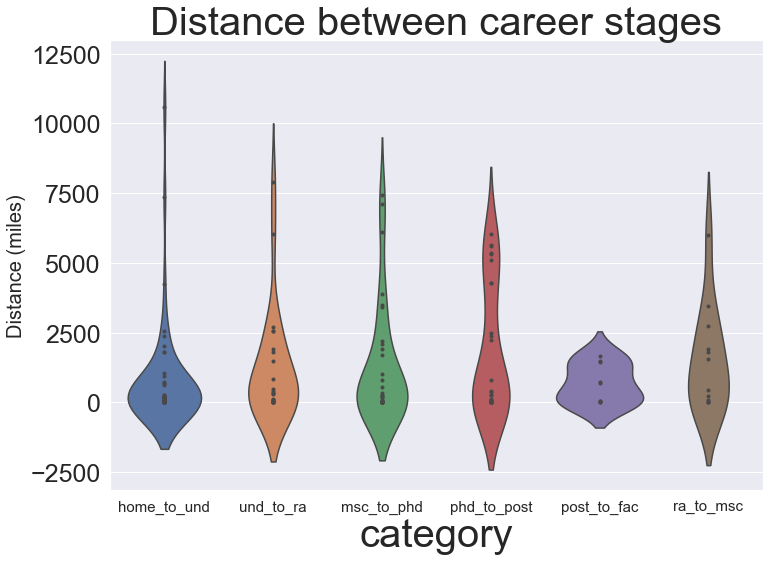

In [190]:
#Plot the distances!
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27),'font.size': 50, 'axes.labelsize': 40, 'legend.fontsize': 32.0, 
    'axes.titlesize': 40, 'xtick.labelsize': 15, 'ytick.labelsize': 25})

ax = sns.violinplot(x="category", y="distance", data=tmp, inner="points")
ax.set_title('Distance between career stages')
ax.set_ylabel('Distance (miles)',fontsize=20);



In [160]:
dist_per_sub = []

for person in range(len(loc_df.iloc[:,1])):
    
    clean_loc_df = loc_df.iloc[person,:].dropna()
    vals = loc_df.iloc[person,1:].dropna().values
    newshape = (len(vals)//2, 2)
    reshaped = np.reshape(vals, newshape)
    
    dist = []
    for yy in range(len(reshaped)-1):
        dist.extend([distance.distance(reshaped[yy], reshaped[yy+1]).miles])
    dist_per_sub.append(sum(dist))
    

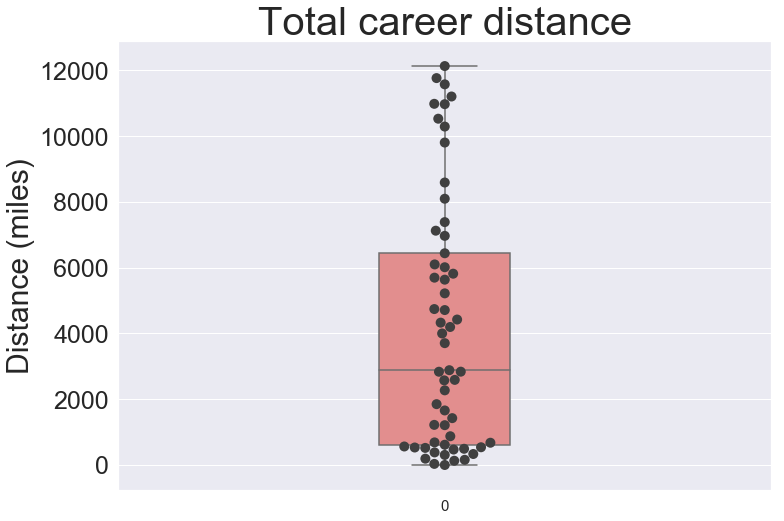

In [186]:
#PLOT THE TOTAL DISTANCES
ax = sns.boxplot(data=dist_per_sub,width=0.2,color='lightcoral').set_title('Total career distance')

ax = sns.swarmplot(data=dist_per_sub,color=".25", size=10)

ax.set_ylabel('Distance (miles)',fontsize=30);
